<a href="https://colab.research.google.com/github/kodindonesia/COLAB_Canvas-Video_Tutorials/blob/master/00_Manual_Canvas_cv_and_Video_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kodindonesia provides a helper to create, show and download images in Colab

In [1]:
# download Kodindonesia Colab helpers
!git clone https://github.com/kodindonesia/kicolab.git     &> /dev/null

from kicolab.cvhelper import Canvas_cv, Video_cv           # import helpers in Python

# Create a canvas, draw, show the drawing:

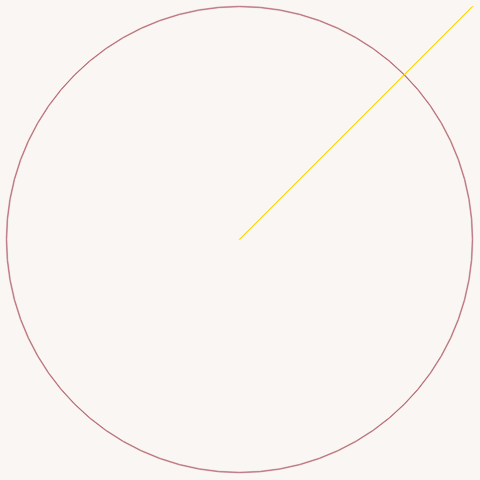

In [ ]:
# create a paintable canvas of size 480 by 480 pixels:
# if you get an error when you create the canvas, run the first block of code with !git clone...
c = Canvas_cv() 
# c = Canvas_cv(480, 480)
# c = Canvas_cv(width=480, height=480)
# c = Canvas_cv(width=480, height=480, color='scarlet sage', background_color='light orange')

# "01" commands
# "01" means that the canvas is considered to be of size -1 to +1 (instead of using the pixels as a reference)

# Draw a circle of radius 1 at the center:
c.draw_circle01(1) 
# c.draw_circle01( 1, (0,0) ) 
# c.draw_circle01( radius01=1, center01=(0,0), color='scarlet sage', thickness=c.SOLID ) #  to fill the circle 

# changes the current color for the next drawing action to gold
c.set_color('gold')  
# c.set_color_rgb(255, 215, 0) # set the current color to gold using its RGB code (0 to 255 range for Red, Green and Blue)

c.draw_line01( (0,0), (1,1)) # Draw a line from the centre point (0,0) to (1,1)

c.show() # display the image in Colab

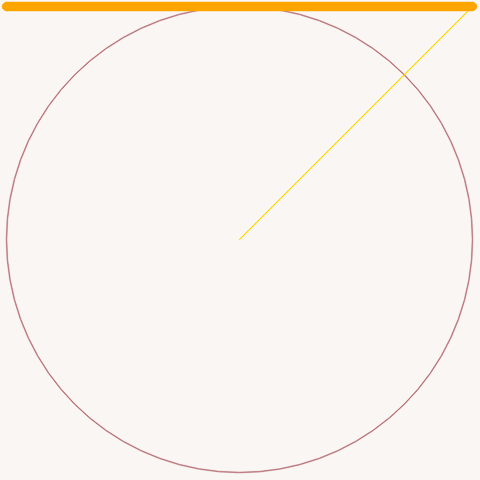

In [ ]:
# continue to add drawings to the same canvas, until you do c.Clear()

c.set_thickness(8) # changes the current thickness for the next drawing action 

c.draw_line_to01( (-1, +1) , color='orange') # continue to draw on the canvas, from the last point to the new point

c.show()

# You can draw using pixels as unity of meausure, instead of percentage:

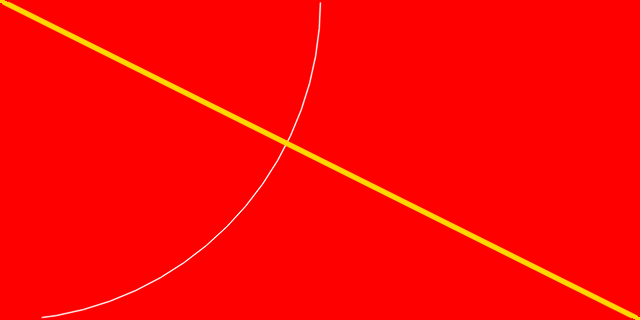

In [ ]:
width = 640;  height = 320

c = Canvas_cv(width, height, color='white', background_color='red')

c.draw_circle(radius= height, center=(0,0)) # instead of 'draw_circle01'
c.draw_line( point_from=(0,0), point_to=(width-1, height-1), color='gold', thickness=3) # instead of 'draw_line01'

c.show()

# Advanced: you can use Open_CV together with the kicolab helper

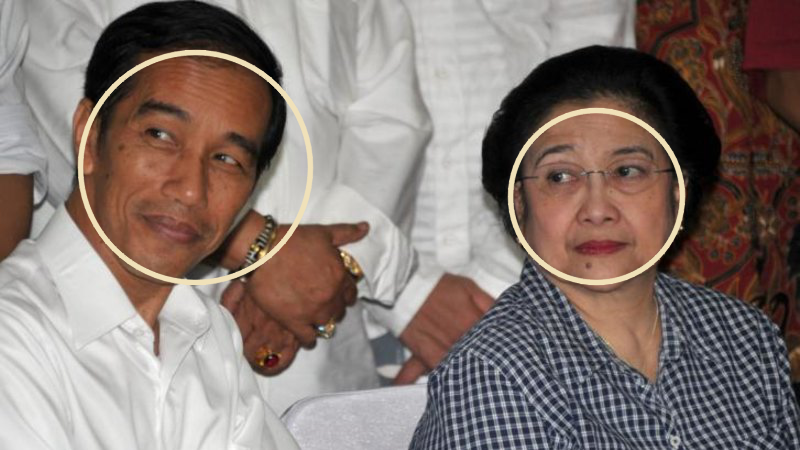

In [3]:
import cv2 as cv # this is a the most powerful Computer Vision library (excluding Deep Learning) 

image_address = 'https://static.ffx.io/images/$zoom_1.457%2C$multiply_0.7554%2C$ratio_1.776846%2C$width_1059%2C$x_0%2C$y_0/t_crop_custom/q_86%2Cf_auto/66b6a466cc129fb035caa0ff9561883f5415ccc6'

canvas = Canvas_cv()
canvas.set_image(image_address) # 'set_image' loads an image from the internet, or from the colab file system, or from google drive, or from an image created in cv2 (openCV)

face_finder = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml') # open_cv to find faces in images
gray = cv.cvtColor(canvas.get_image(), cv.COLOR_BGR2GRAY) # open_cv command to convert BGR color image to grayscale
faces = face_finder.detectMultiScale(gray, 1.3, 2) # open_cv to find faces in images
for (x,y,w,h) in faces:
  radius=int(max(w,h)/2);  center=(int(x+w/2), int(y+h/2))
  canvas.draw_circle(radius, center , 'vanilla custard', thickness=3)

canvas.show()
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

# Rose example

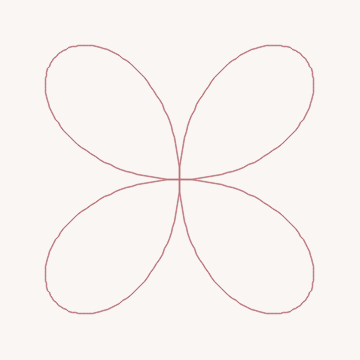

In [4]:
def point_on_rose(canvas, n, angle):
  radius = canvas.math_sine(n * angle) # rose formula   
  return canvas.get_circle_point01(angle, radius)
  
def draw_rose(canvas, n, d=1, color='scarlet sage', thickness=1):
  for angle in range(0, 360):
    point_from = point_on_rose(canvas,n,angle)
    point_to   = point_on_rose(canvas,n,angle+d)
    canvas.draw_line01( point_from, point_to, color, thickness)  


canvas = Canvas_cv(360,360)   # create canvas to draw onto
draw_rose(canvas, 2)          # draw the curve using the function above
canvas.show()                 # show the drawing on the canvas

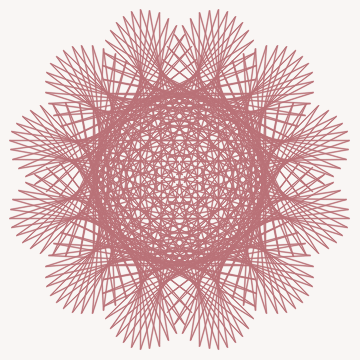

In [ ]:
canvas.clear()      # clear the canvas from the previous drawing
draw_rose(canvas, n=118, d=100) 
canvas.show()

In [ ]:
# canvas.download()
# canvas.download('rose', is_jpg=True) # smaller file with your favourite name

# **How to create a video from Canvas_cv**

In [8]:
d = 50;  n_from = .1;  n_to = 6;  number_of_video_frames=240

canvas = Canvas_cv(width=360, height=360) # create a canvas
vid = Video_cv(fps=14, name="fractions_of_n", frame=canvas) # give a name, a "frames per second", and link the Video_cv to your Canvas_cv

import numpy as np 
for n in np.linspace(n_from, n_to, number_of_video_frames): # for loop to create many drawings, one for each video frame
  draw_rose(canvas, n, d)
  vid.write_frame() # write the canvas to the video

vid.end_video() # finalise the video to show it (or to download it)
#vid2.end_video(download=False, show=True) # if the video is very large, download it instead of showing it


In [ ]:
vid.download() # to download a video after it has been created